f(0.223) = 0.8000249192094632
f(0.554) = 0.574588382530314


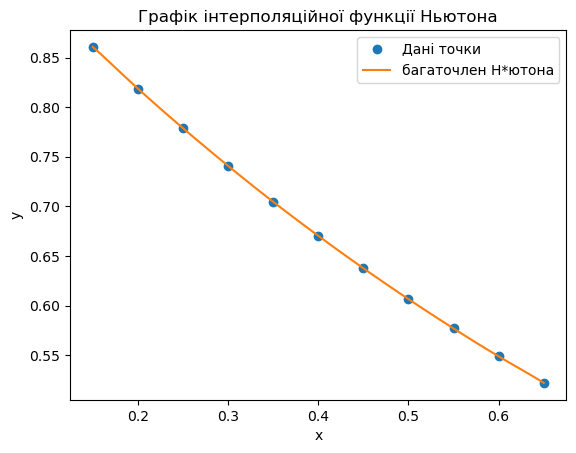

In [1]:
import numpy as np 

from math import factorial 

import matplotlib.pyplot as plt 

 

# задані точки 

x = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65])  # задаємо x генератором списків 

y = np.array([0.8607, 0.8187, 0.7788, 0.7408, 0.7046, 0.6703, 0.6376, 0.6065, 0.5769, 0.5488, 0.5220]) 

 

# перша інтерполяційна формула 

def first_interpolation(x, y, x0): 

    n = len(x) 

    f = np.zeros((n, n)) 

    f[:, 0] = y 

    for j in range(1, n): 

        for i in range(n - j): 

            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i]) 

    ans = 0 

    for j in range(n): 

        prod = f[0, j] 

        for i in range(j): 

            prod *= (x0 - x[i]) 

        ans += prod 

    return ans 

 

# друга інтерполяційна формула 

def second_interpolation(x, y, x0): 

    n = len(x) 

    f = np.zeros((n, n)) 

    f[:, 0] = y 

    for j in range(1, n): 

        for i in range(n - j): 

            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i]) 

    ans = f[0, 0] 

    for j in range(1, n): 

        prod = f[0, j] 

        for i in range(j): 

            prod *= (x0 - x[i]) 

        ans += prod 

    return ans 

 

x1 = 0.223                                 

x2 = 0.554 

 

y1 = first_interpolation(x, y, x1) 

y2 = second_interpolation(x, y, x2) 

 

print(f"f({x1}) = {y1}") 

print(f"f({x2}) = {y2}") 

 

 

# будуємо графік інтерполяційної функції 

xx = np.linspace(np.min(x), np.max(x), 100) 

yy = np.zeros_like(xx) 

 

for i in range(len(xx)): 

    yy[i] = second_interpolation(x, y, xx[i]) 

plt.plot(x, y, 'o', label='Дані точки') 

plt.plot(xx, yy, label='багаточлен Н*ютона') 

plt.title("Графік інтерполяційної функції Ньютона") 

plt.xlabel("x") 

plt.ylabel("y") 

plt.legend() 

plt.show() 